# Instalação de bibliotecas

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

# Importação de bibliotecas

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamentos dos dados e construção do dataset

In [6]:
!git clone https://github.com/beatrizfariasilva/Formacao-em-Machine-Learning.git

Cloning into 'Formacao-em-Machine-Learning'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 184.67 KiB | 4.62 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [7]:
df_diabetes = pd.read_csv("Formacao-em-Machine-Learning/exame_diabetes.csv")

In [8]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [9]:
df_diabetes.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


# Transformação de features

In [10]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [11]:
df_diabetes.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


A variável id_paciente, por se tratar de uma variável apenas de identificação do paciente, não acrescentará na predição do resultado. Vamos removê-la.

In [12]:
#removendo id_paciente
df_diabetes.drop(columns=['id_paciente'], axis=1, inplace=True)

In [13]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genero     100 non-null    object
 1   idade      100 non-null    int64 
 2   peso       100 non-null    int64 
 3   altura     100 non-null    int64 
 4   resultado  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


Como o nosso foco é fazer uma regressão linear, o ideal é que todos os nossos dados tenham valores numéricos. Para isso, vamos aplicar o mecanismo de One Hot Encoding com a variável gênero

In [14]:
#vendo se há outro gênero descrito no df sem ser 'M' ou 'F'
df_diabetes.genero.unique()

array(['M', 'F'], dtype=object)

In [15]:
#aplicando o One Hot Encoding
df_diabetes=pd.get_dummies(df_diabetes, columns=['genero'], dtype='int64')

In [16]:
df_diabetes.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


In [17]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


# Visualização de dados e suas relações

<Axes: >

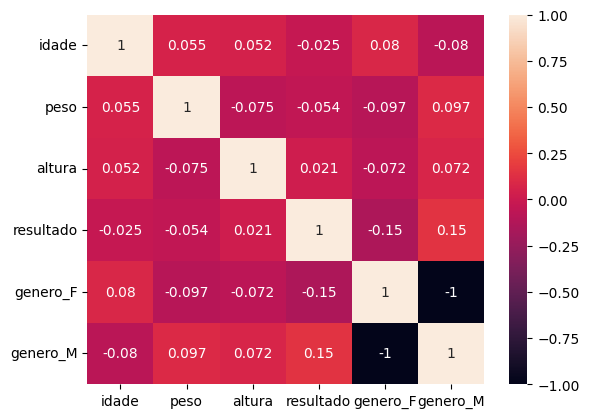

In [18]:
sns.heatmap(df_diabetes.corr(), annot=True)

Queremos buscar alguma variável independente que esteja mais relacionada com a variável resultado, para isso, vamos filtrar o heatmap.

<Axes: >

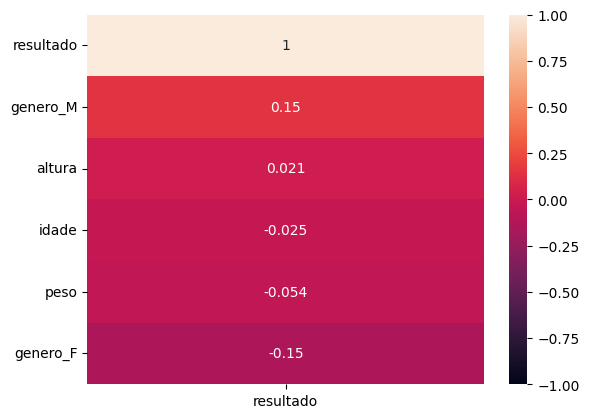

In [19]:
sns.heatmap(df_diabetes.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

genero_M parece ser a variável com maior correlação, no entanto, o valor ainda é baixo (0.15 de 1.00). Ou seja, nenhuma correlação parece muito relevante.

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


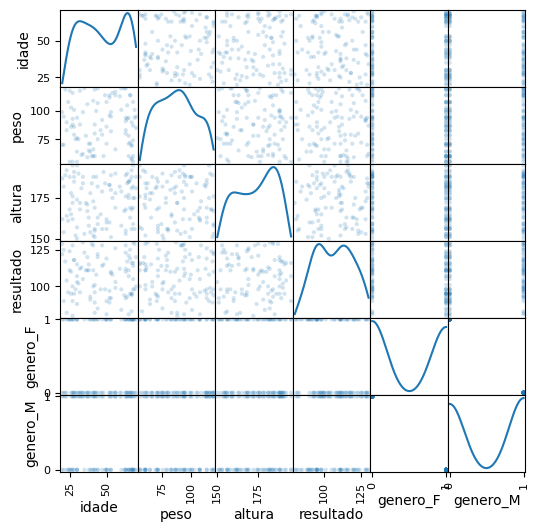

In [20]:
#visualizando uma matriz de distribuição scatter
pd.plotting.scatter_matrix(df_diabetes, alpha=0.2, figsize=(6,6), diagonal='kde')

Aqui também não dá pra ver nenhuma relação entre as variáveis em forma de linha ascendente ou descendente. Logo, conclui-se que nenhuma tem uma relação forte uma com a outra.

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

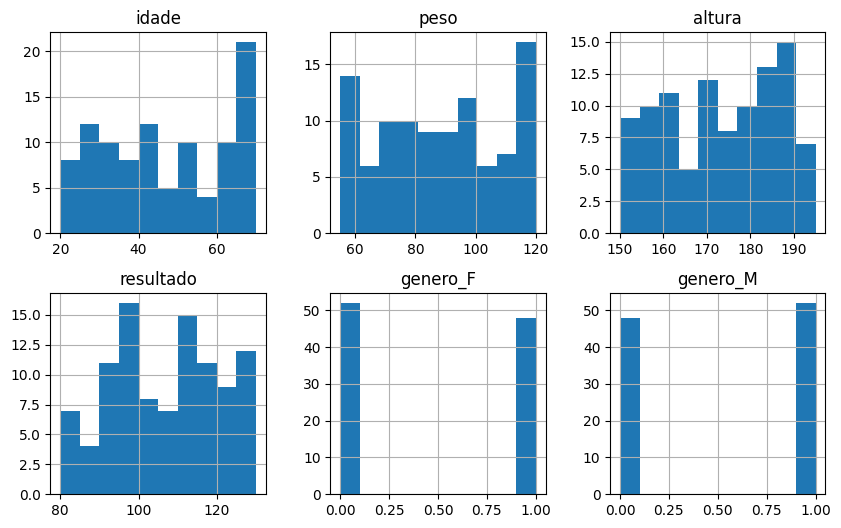

In [21]:
#visualizando uma matriz de histogramas
df_diabetes.hist(layout=(2,3), figsize=(10,6))

Nenhuma variável aparenta seguir uma distribuição normal.

### Nova feature

Vamos testar criar uma nova feature para ver se ela teria alguma correlação com a variável alvo.

In [22]:
df_diabetes['imc']=(df_diabetes.peso/(df_diabetes.altura/100)**2)

In [23]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [24]:
df_diabetes.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


Agora vamos investigar as correlações

<Axes: >

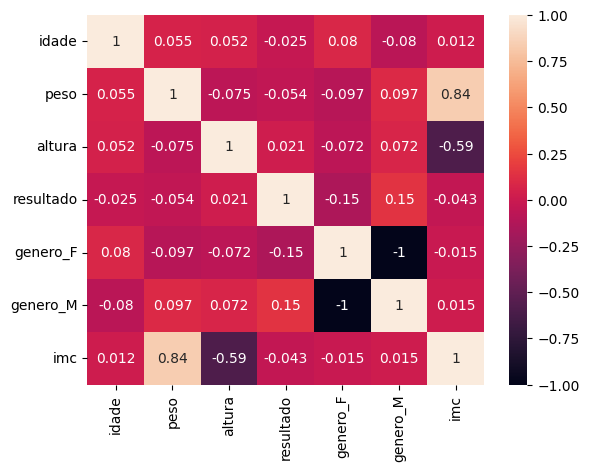

In [25]:
sns.heatmap(df_diabetes.corr(), annot=True)

<Axes: >

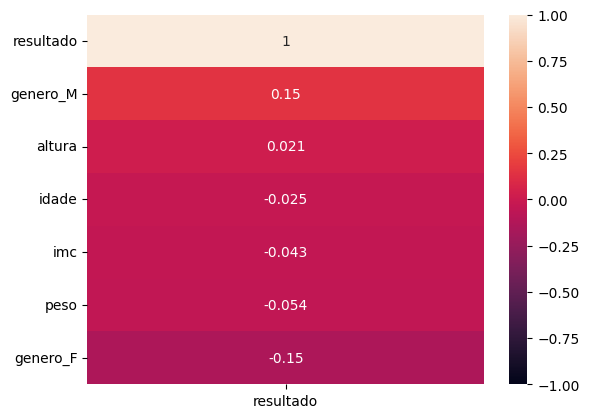

In [26]:
sns.heatmap(df_diabetes.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

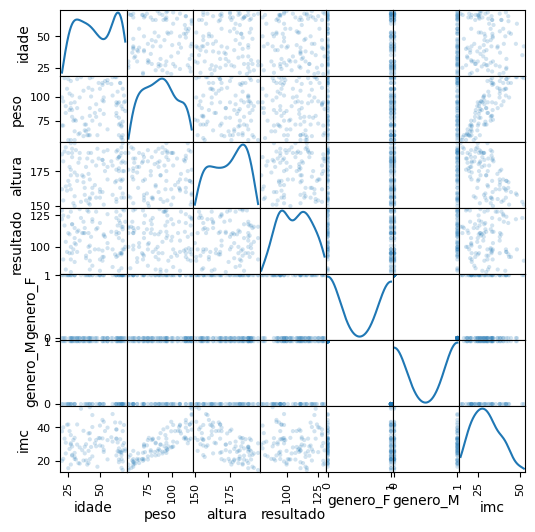

In [27]:
pd.plotting.scatter_matrix(df_diabetes, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

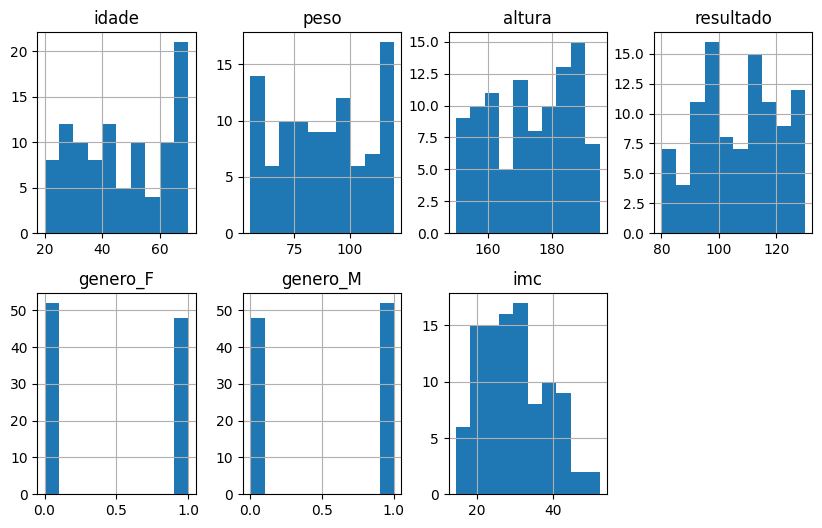

In [28]:
df_diabetes.hist(layout=(2,4), figsize=(10,6))

Nota-se uma relação positiva entre IMC e peso e relação negativa entre IMC e altura menos forte do que entre imc e peso. Agora, com relação ao que estavamos buscando, algum tipo de relação entre IMC e a variável alvo, percebeu-se que não há correlação ou achados importantes.

# Split de treino e teste

In [29]:
#baixando a biblioteca
!pip install scikit-learn

In [30]:
#importando os pacotes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [31]:
df_diabetes

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
...,...,...,...,...,...,...,...
95,52,96,183,89,1,0,28.666129
96,68,108,169,105,1,0,37.813802
97,21,95,154,125,0,1,40.057345
98,41,109,173,128,0,1,36.419526


In [33]:
#criando as variáveis X e y
X=df_diabetes.drop(columns=['imc', 'resultado'])
y=df_diabetes.resultado

In [34]:
#dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

# Treinamento do modelo

In [35]:
modelo=LinearRegression().fit(X_train, y_train)

In [36]:
#predizendo valores a partir do x_test
y_pred=modelo.predict(X_test)

In [37]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

esses valores acima, o modelo predisse com base no treinamento de X_train e y_train, a partir dos valores de X_test.

# Avaliando o modelo

In [38]:
#calculo de R² Score entre as variáveis de teste
modelo.score(X_train, y_train)

0.06218388634297267

Esse valor de 0.062 me diz que o modelo não conseguiu achar uma relação muito boa entre as variáveis X_train e y_train (considerando que o teto seria 1.00).

In [39]:
#calculo de R² Score entre y_test e y_pred
r2_score(y_test, y_pred)

-0.1364090447910642

Se o modelo não havia performado muito bem no treinamento, agora no teste desempenhou ainda pior, o valor negativo nos informa que a relação entre y_test e y_pred foi baixíssima (considerando o teto de 1.00)

In [40]:
#calculo de MEA (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

12.695569181179541

O MEA nos diz o quanto o valor pode estar errado para cima e para baixo. Ou seja, o valor predito pode ser superestimado no máximo 12.69 ou subestimado no máximo 12.69 unidades. O que é um risco quando se fala sobre pacientes com diabetes, pois 12.69 unidades pode separar um diagnóstico de paciente ou diabetes ou não.

Como o modelo não performou de maneira adequada, vamos testar usar a variável "IMC" ao invés de todas as variáveis dependentes para ver se muda alguma coisa no resultado.

---


# Testando novo modelo

In [57]:
#separando as variáveis X e y
X2=pd.DataFrame(df_diabetes['imc'])
y2=df_diabetes.resultado

In [58]:
#dividindo entre treino e teste
X_train2, X_test2, y_train2, y_test2=train_test_split(X2, y2, train_size=0.7, random_state=51)

In [59]:
#treinando o modelo
modelo2=LinearRegression().fit(X_train2, y_train2)

In [60]:
#predizendo valores
y_pred2=modelo2.predict(X_test2)

In [61]:
#avaliando com R² Score
r2_score(y_test2, y_pred2)

-0.0889832856240178

In [62]:
#avaliando o modelo com MAE
mean_absolute_error(y_test2, y_pred2)

12.505651407060103

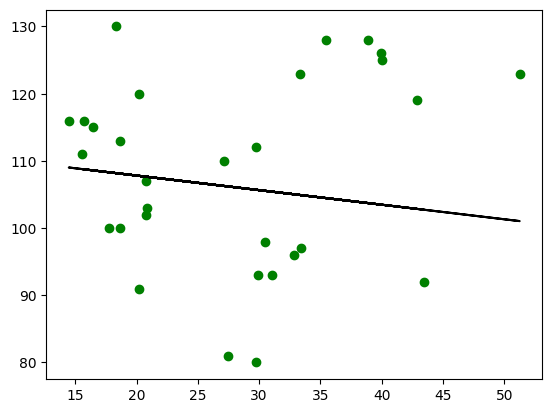

In [63]:
#visualizando em formato de gráfico
plt.scatter(X_test2, y_test2, color='g')
plt.plot(X_test2, y_pred2, color='k')

Observa-se a reta que corresponde as predições feitas. No gráfico há muitos pontos distantes da reta, o que nos diz que a predição não foi feita de maneira satisfatória pelo modelo.

Vimos que da mesma forma que o teste anterior, além das métricas muito baixas (-0.088 de r² e 12.50 de MAE), um gráfico gráfico que mostra que, o modelo não conseguiu encontrar uma relação suficientemente boa utilizando a regressão linear entre a variável 'IMC' e 'Resultado', não sendo a Regressão Linear um bom modelo para predições de resultados de diabetes com essas informações presentes no Dataset.